In [1]:
with open("data/abalone.names") as f:
    print(f.read())

1. Title of Database: Abalone data

2. Sources:

   (a) Original owners of database:
	Marine Resources Division
	Marine Research Laboratories - Taroona
	Department of Primary Industry and Fisheries, Tasmania
	GPO Box 619F, Hobart, Tasmania 7001, Australia
	(contact: Warwick Nash +61 02 277277, wnash@dpi.tas.gov.au)

   (b) Donor of database:
	Sam Waugh (Sam.Waugh@cs.utas.edu.au)
	Department of Computer Science, University of Tasmania
	GPO Box 252C, Hobart, Tasmania 7001, Australia

   (c) Date received: December 1995


3. Past Usage:

   Sam Waugh (1995) "Extending and benchmarking Cascade-Correlation", PhD
   thesis, Computer Science Department, University of Tasmania.

   -- Test set performance (final 1044 examples, first 3133 used for training):
	24.86% Cascade-Correlation (no hidden nodes)
	26.25% Cascade-Correlation (5 hidden nodes)
	21.5%  C4.5
	 0.0%  Linear Discriminate Analysis
	 3.57% k=5 Nearest Neighbour
      (Problem encoded as a classification task)

   -- Data set samp

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

headers = ['sex', 'length', 'diameter', 'height', 'whole_weight', 'shucked_weight', 'viscera_weight', 'shell_weight', 'rings']
df = pd.read_csv('data/abalone.data', names=headers)

In [3]:
df.head(10)

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             4177 non-null   object 
 1   length          4177 non-null   float64
 2   diameter        4177 non-null   float64
 3   height          4177 non-null   float64
 4   whole_weight    4177 non-null   float64
 5   shucked_weight  4177 non-null   float64
 6   viscera_weight  4177 non-null   float64
 7   shell_weight    4177 non-null   float64
 8   rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [5]:
row = df.shape[0]
column = df.shape[1]
print(f"Total number of instances: {row} \nTotal number of features: {column}") 

Total number of instances: 4177 
Total number of features: 9


<AxesSubplot:>

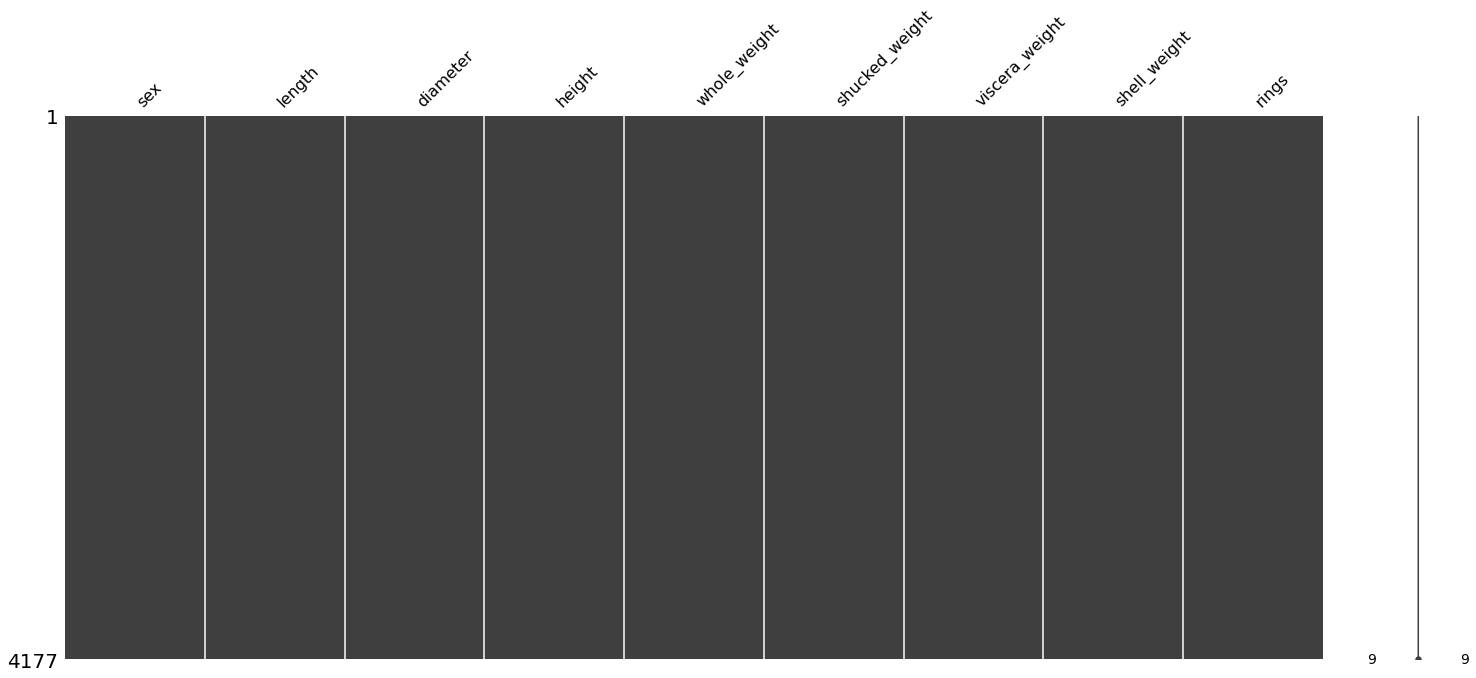

In [6]:
import missingno as msno

df.isnull().sum().sort_values(ascending=False)
msno.matrix(df)

In [7]:
df.describe()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [8]:
df['sex'].value_counts()

M    1528
I    1342
F    1307
Name: sex, dtype: int64

Text(0.5, 1.0, 'Distribution of Rings')

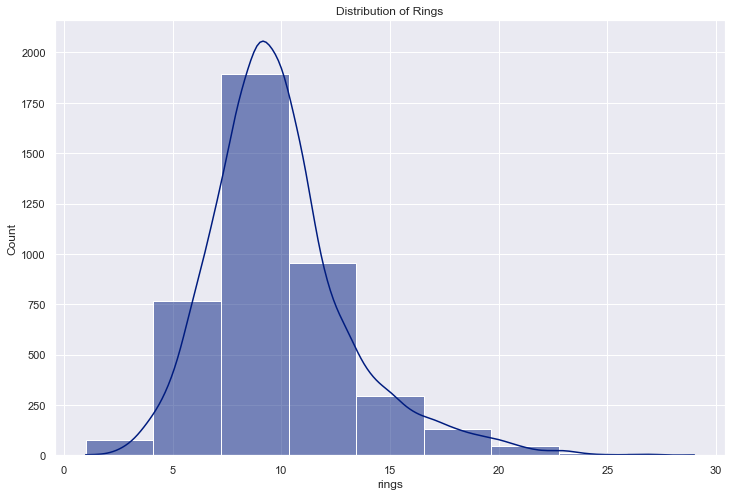

In [9]:
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('dark')
sns.set_context('notebook')

start, stop = df['rings'].min(), df['rings'].max()
bins = np.linspace(start, stop, 10)
sns.histplot(df['rings'], kde = True, bins=bins)
plt.title("Distribution of Rings")

Text(0.5, 1.0, 'Relationship between Sex and Rings')

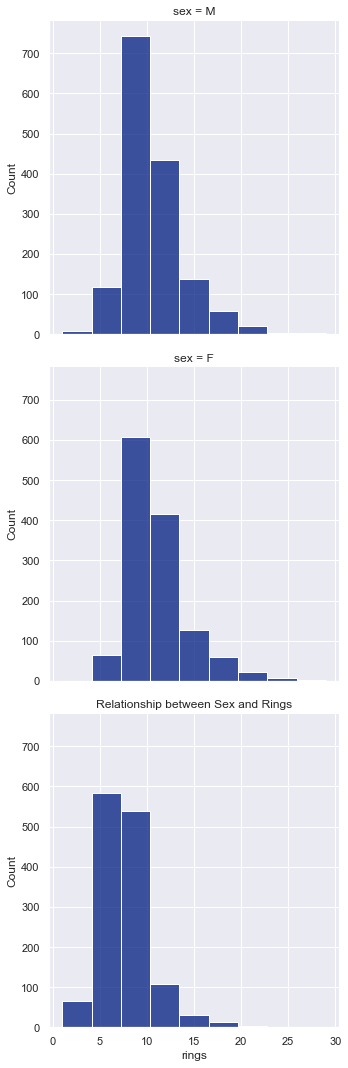

In [10]:
sns.displot(x='rings', row='sex', data=df, bins=bins)
plt.title(f"Relationship between Sex and Rings")

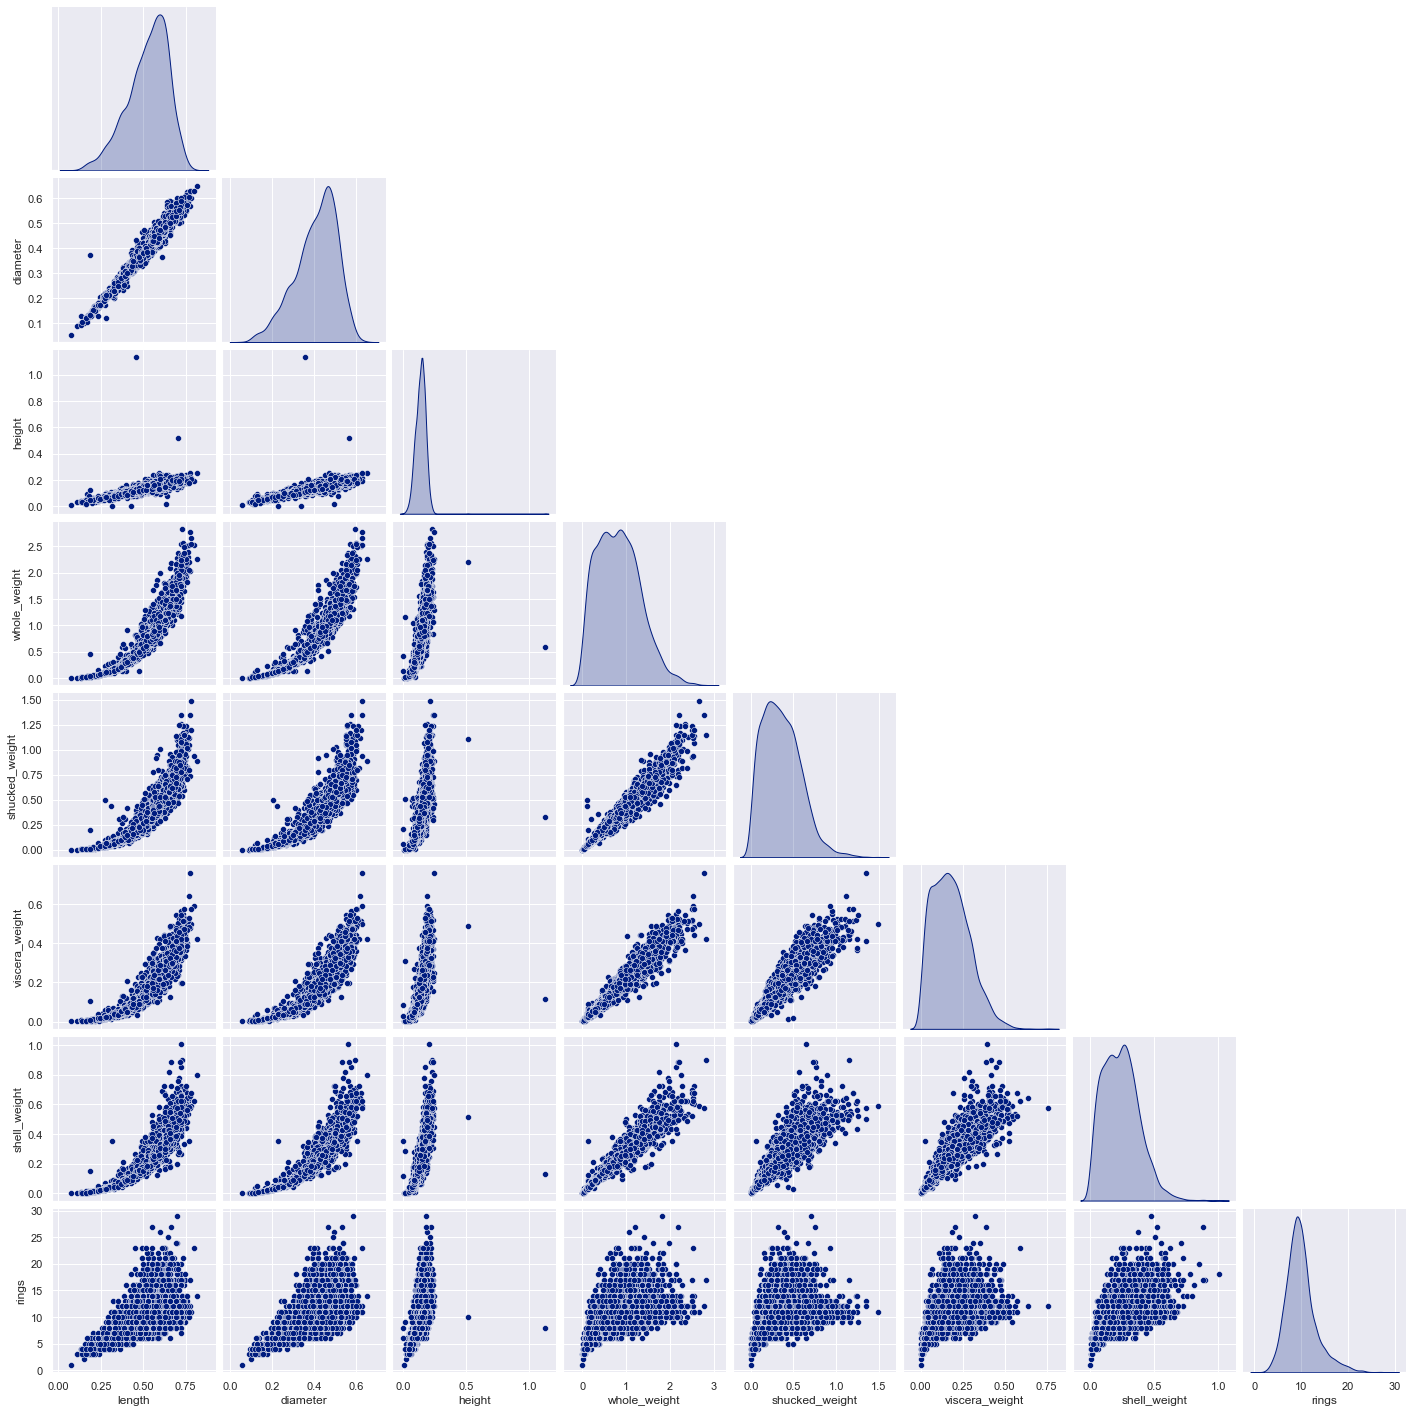

In [11]:
sns.pairplot(df, diag_kind='kde', corner=True)
plt.show()

<AxesSubplot:>

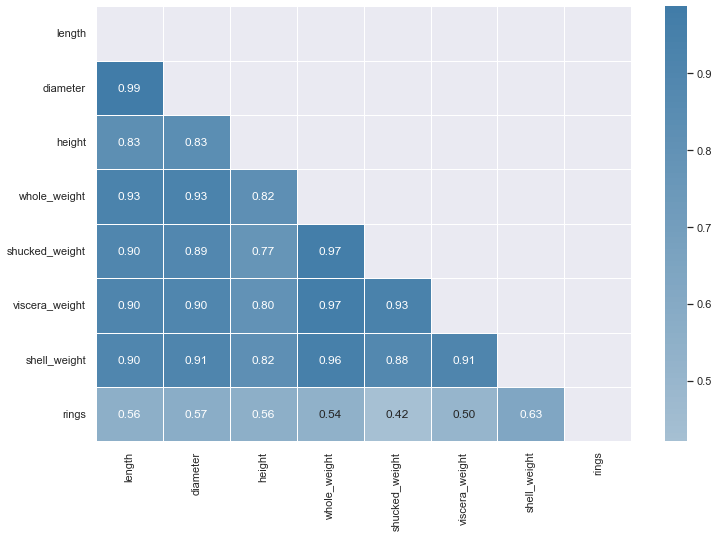

In [12]:
df.corr()
cmap = sns.diverging_palette(h_neg=10, h_pos=240, as_cmap=True)
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(), mask=mask, center=0, cmap=cmap, linewidths=1, annot=True, fmt=".2f")

In [13]:
## Remove features that have correlation greater than 0.95
corr_matrix = df.corr().abs()
tri_df = corr_matrix.mask(mask)
to_drop = [c for c in tri_df.columns if any(tri_df[c] > 0.95)]
df = df.drop(to_drop, axis=1)
df.columns

Index(['sex', 'diameter', 'height', 'shucked_weight', 'viscera_weight',
       'shell_weight', 'rings'],
      dtype='object')

In [14]:
## Encoding and scaling
from sklearn.preprocessing import StandardScaler

temp_cat = pd.get_dummies(df['sex'], prefix='sex', drop_first=True)

for num in df.drop(['sex', 'rings'], axis=1).columns:
    scaler = StandardScaler()
    scaler.fit(df[[num]])
    temp = scaler.transform(df[[num]])
    temp_cat[num+'_scaled'] = temp

df_processed = pd.concat([df[['rings']], temp_cat], axis=1)
    

In [15]:
df_processed

,rings,sex_I,sex_M,diameter_scaled,height_scaled,shucked_weight_scaled,viscera_weight_scaled,shell_weight_scaled
0,15,0,1,-0.432149,-1.064424,-0.607685,-0.726212,-0.638217
1,7,0,1,-1.439929,-1.183978,-1.170910,-1.205221,-1.212987
2,9,0,0,0.122130,-0.107991,-0.463500,-0.356690,-0.207139
3,10,0,1,-0.432149,-0.347099,-0.648238,-0.607600,-0.602294
4,7,1,0,-1.540707,-1.423087,-1.215968,-1.287337,-1.320757
...,...,...,...,...,...,...,...,...
4172,11,0,0,0.424464,0.609334,0.047908,0.532900,0.073062
4173,10,0,1,0.323686,-0.107991,0.358808,0.309362,0.155685
4174,9,0,1,0.676409,1.565767,0.748559,0.975413,0.496955
4175,10,0,0,0.777187,0.250672,0.773341,0.733627,0.410739


In [16]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold, RandomizedSearchCV
from sklearn.linear_model import LinearRegression

y = df_processed['rings']
X = df_processed.drop(['rings'], axis=1)

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

y_null = np.zeros_like(y_test, dtype=float)
y_null.fill(y_train.mean())
baseline = np.sqrt(mean_squared_error(y_test, y_null))
print("Baseline model RMSE: ", baseline)


Baseline model RMSE:  3.2181312212004385


In [18]:
lm = LinearRegression()

cv = KFold(n_splits=5, random_state=1, shuffle=True)
mse_scores = cross_val_score(lm, X_train, y_train, cv=cv, scoring='neg_mean_squared_error')
mse_mean = (-mse_scores).mean()
print('MSE cross validation: ', mse_mean)
print('RMSE cross validation: ',np.sqrt(mse_mean))

MSE cross validation:  4.986854680656423
RMSE cross validation:  2.2331266602359174


In [19]:
lm.fit(X_train,y_train)
prediction = lm.predict(X_test)

print('MAE: {}'.format(mean_absolute_error(y_test, prediction)))
print('MSE: {}'.format(mean_squared_error(y_test, prediction)))
print('RMSE: {}'.format(np.sqrt(mean_squared_error(y_test, prediction))))

MAE: 1.5430564482013647
MSE: 5.364781623832589
RMSE: 2.3161998238132626


In [20]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(2, 10, num = 10)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
grid_search = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [21]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr_random = RandomizedSearchCV(estimator = rfr, param_distributions = grid_search, n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = -1)

rfr_random.fit(X_train,y_train)
rfr_random.best_params_


Fitting 5 folds for each of 10 candidates, totalling 50 fits


{'n_estimators': 60,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 7,
 'bootstrap': True}

In [22]:
rfr_best = RandomForestRegressor(**rfr_random.best_params_)

In [23]:
cv = KFold(n_splits=5, random_state=1, shuffle=True)
mse_scores = cross_val_score(rfr_best, X_train, y_train, cv=cv, scoring='neg_mean_squared_error')
mse_mean = (-mse_scores).mean()
print('MSE cross validation: ', mse_mean)
print('RMSE cross validation: ',np.sqrt(mse_mean))

MSE cross validation:  4.791810405656304
RMSE cross validation:  2.1890204214799605


In [24]:
rfr_best.fit(X_train,y_train)
prediction = rfr_best.predict(X_test)
print('MAE: {}'.format(mean_absolute_error(y_test, prediction)))
print('MSE: {}'.format(mean_squared_error(y_test, prediction)))
print('RMSE: {}'.format(np.sqrt(mean_squared_error(y_test, prediction))))

MAE: 1.4386106490662371
MSE: 4.612116137130749
RMSE: 2.1475837904796053


In [25]:
from sklearn.ensemble import GradientBoostingRegressor

n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 5)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(2, 20, num = 5)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
criterion = ["friedman_mse", "mse"]
grid_search = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'criterion': criterion}

In [26]:
gbt = GradientBoostingRegressor()
gbt_random = RandomizedSearchCV(estimator = gbt, param_distributions = grid_search, n_iter = 5, cv = 5, verbose=2, random_state=42, n_jobs = -1)

gbt_random.fit(X_train, y_train)
gbt_random.best_params_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


{'n_estimators': 32,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 6,
 'criterion': 'friedman_mse'}

In [28]:
gbt_best = GradientBoostingRegressor(**gbt_random.best_params_)
cv = KFold(n_splits=5, random_state=1, shuffle=True)
mse_scores = cross_val_score(gbt_best, X_train, y_train, cv=cv, scoring='neg_mean_squared_error')
mse_mean = (-mse_scores).mean()
print (mse_mean)
print('RMSE cross validation: ',np.sqrt(mse_mean))

4.870748860581768
RMSE cross validation:  2.206977313109894


In [29]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Ridge

selector = SelectFromModel(Ridge())
selector.fit(X_train, y_train)
print(X.columns[selector.get_support()])
X_train_imp = selector.transform(X_train)
X_test_imp = selector.transform(X_test)

Index(['shucked_weight_scaled', 'shell_weight_scaled'], dtype='object')


In [30]:
rfr_best.fit(X_train_imp,y_train)
prediction = rfr_best.predict(X_test_imp)
print('MAE: {}'.format(mean_absolute_error(y_test, prediction)))
print('MSE: {}'.format(mean_squared_error(y_test, prediction)))
print('RMSE: {}'.format(np.sqrt(mean_squared_error(y_test, prediction))))

MAE: 1.500904943912551
MSE: 4.715940675819524
RMSE: 2.1716216695869295


In [31]:
from sklearn.linear_model import Lasso

selector = SelectFromModel(Ridge())
selector.fit(X_train, y_train)
print(X.columns[selector.get_support()])
X_train_imp = selector.transform(X_train)
X_test_imp = selector.transform(X_test)

rfr_best.fit(X_train_imp,y_train)
prediction = rfr_best.predict(X_test_imp)
print('MAE: {}'.format(mean_absolute_error(y_test, prediction)))
print('MSE: {}'.format(mean_squared_error(y_test, prediction)))
print('RMSE: {}'.format(np.sqrt(mean_squared_error(y_test, prediction))))

Index(['shucked_weight_scaled', 'shell_weight_scaled'], dtype='object')
MAE: 1.502261298793322
MSE: 4.738095115861957
RMSE: 2.1767165906157735
[CV] END bootstrap=False, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.4s
[CV] END bootstrap=False, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.3s
[CV] END bootstrap=False, max_depth=9, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=80; total time=   2.0s
[CV] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.6s
[CV] END bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=10; total time=   0.1s
[CV] END bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=10; total time=   0.1s
[CV] END bootstrap=True, max_depth=7, max_fea

[CV] END bootstrap=False, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.4s
[CV] END bootstrap=False, max_depth=9, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=80; total time=   2.0s
[CV] END bootstrap=False, max_depth=9, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=80; total time=   1.2s
[CV] END bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=10; total time=   0.3s
[CV] END bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=60; total time=   1.3s
[CV] END bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=60; total time=   1.4s
[CV] END bootstrap=False, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=30; total time=   0.7s
[CV] END bootstrap=True, max_depth=10, max_features=au